### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



     Tienda     Ingreso Total
0  Tienda 1  1,150,880,400.00
1  Tienda 2  1,116,343,500.00
2  Tienda 3  1,098,019,600.00
3  Tienda 4  1,038,375,700.00


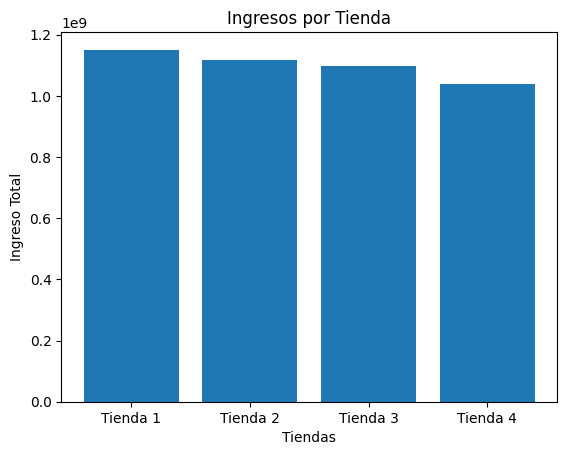

In [ ]:
# Calcular el ingreso total de cada tienda
ingresoTienda_1 = tienda["Precio"].sum()
ingresoTienda_2 = tienda2["Precio"].sum()
ingresoTienda_3 = tienda3["Precio"].sum()
ingresoTienda_4 = tienda4["Precio"].sum()

# Crear un DataFrame con los resultados
dfIngresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingresoTienda_1, ingresoTienda_2, ingresoTienda_3, ingresoTienda_4]
})
# Mostrar el resultado
dfIngresos["Ingreso Total"] = dfIngresos["Ingreso Total"].apply(lambda x: "{:,.2f}".format(x))
print(dfIngresos)


import matplotlib.pyplot as plt

dfIngresos["Ingreso Total"] = dfIngresos["Ingreso Total"].str.replace(",", "").astype(float)

plt.bar(dfIngresos["Tienda"], dfIngresos["Ingreso Total"])
plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.title("Ingresos por Tienda")
plt.show()


# 2. Ventas por categoría

Ventas por categoría en Tienda 1:
    Categoría del Producto  Cantidad
7                  Muebles       465
3             Electrónicos       448
5                 Juguetes       324
2        Electrodomésticos       312
1     Deportes y diversión       284
4   Instrumentos musicales       182
6                   Libros       173
0  Artículos para el hogar       171

Ventas por categoría en Tienda 2:
    Categoría del Producto  Cantidad
7                  Muebles       442
3             Electrónicos       422
5                 Juguetes       313
2        Electrodomésticos       305
1     Deportes y diversión       275
4   Instrumentos musicales       224
6                   Libros       197
0  Artículos para el hogar       181

Ventas por categoría en Tienda 3:
    Categoría del Producto  Cantidad
7                  Muebles       499
3             Electrónicos       451
5                 Juguetes       315
2        Electrodomésticos       278
1     Deportes y diversión       277
6       

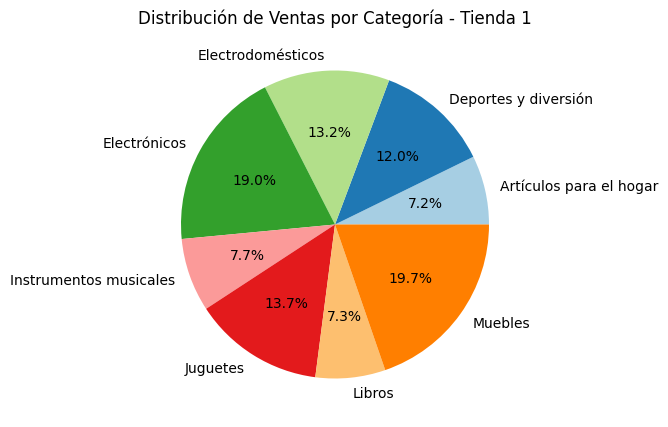

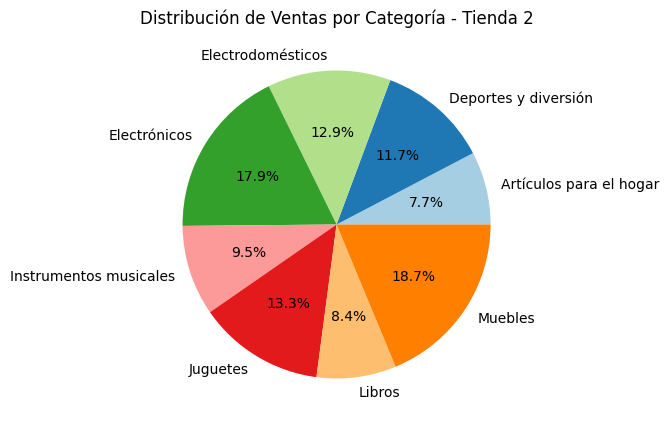

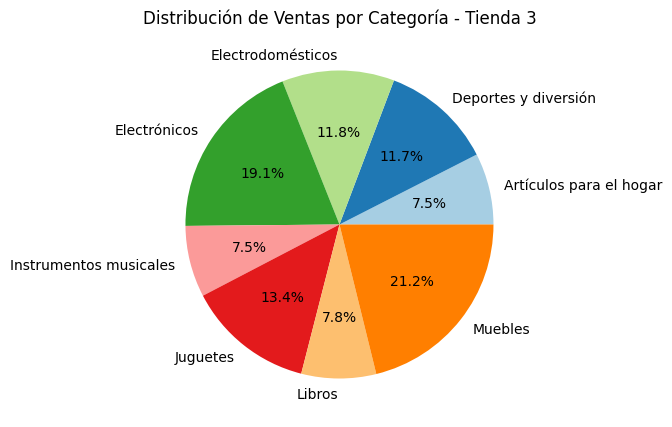

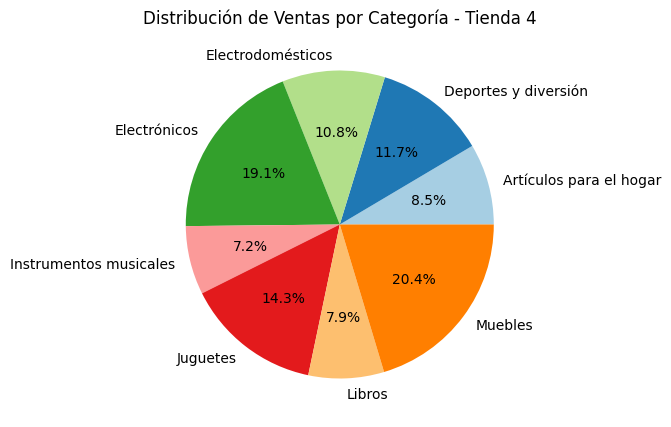

In [ ]:
# Calcular cantidad de productos vendidos por categoría en cada tienda
ventas_tienda_1 = tienda.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_2 = tienda2.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_3 = tienda3.groupby("Categoría del Producto").size().reset_index(name="Cantidad")
ventas_tienda_4 = tienda4.groupby("Categoría del Producto").size().reset_index(name="Cantidad")

# Mostrar los resultados ordenados por cantidad de ventas
print("Ventas por categoría en Tienda 1:")
print(ventas_tienda_1.sort_values(by="Cantidad", ascending=False))

print("\nVentas por categoría en Tienda 2:")
print(ventas_tienda_2.sort_values(by="Cantidad", ascending=False))

print("\nVentas por categoría en Tienda 3:")
print(ventas_tienda_3.sort_values(by="Cantidad", ascending=False))

print("\nVentas por categoría en Tienda 4:")
print(ventas_tienda_4.sort_values(by="Cantidad", ascending=False))


import matplotlib.pyplot as plt

# Función para graficar ventas por categoría en pastel
def graficar_pastel(df, nombre_tienda):
    plt.figure(figsize=(5, 5))
    plt.pie(df["Cantidad"], labels=df["Categoría del Producto"], autopct="%1.1f%%", colors=plt.cm.Paired.colors)
    plt.title(f"Distribución de Ventas por Categoría - {nombre_tienda}")
    plt.show()

# Graficar las ventas en formato pastel para cada tienda
graficar_pastel(ventas_tienda_1, "Tienda 1")
graficar_pastel(ventas_tienda_2, "Tienda 2")
graficar_pastel(ventas_tienda_3, "Tienda 3")
graficar_pastel(ventas_tienda_4, "Tienda 4")

# 3. Calificación promedio de la tienda


Tienda 1: 3.977
Tienda 2: 4.037
Tienda 3: 4.048
Tienda 4: 3.996


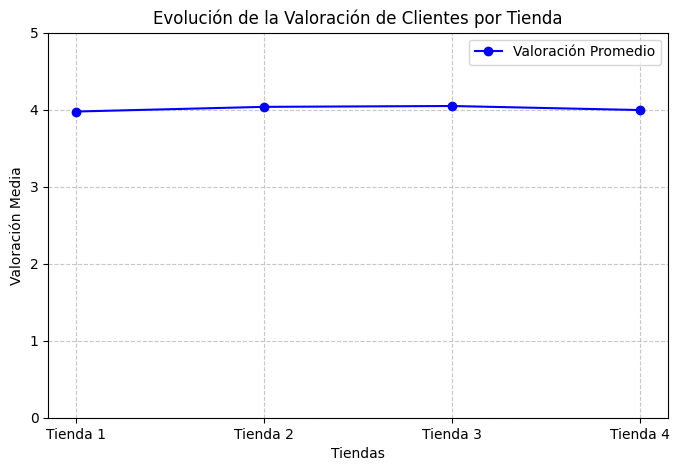

In [ ]:
# Definir función para calcular Promedio
def calcular_valoracion(df):
    suma_calificaciones = 0
    total_productos = 0

    # Recorrer las filas del DataFrame (sin usar pandas en cálculos)
    for _, fila in df.iterrows():
        calificacion = float(fila["Calificación"])  # Asegurar conversión a float
        suma_calificaciones += calificacion
        total_productos += 1

    # Calcular promedio
    return suma_calificaciones / total_productos if total_productos > 0 else 0

# Calcular valoraciones usando la función con los DataFrames cargados
valoracion_tienda_1 = calcular_valoracion(tienda)
valoracion_tienda_2 = calcular_valoracion(tienda2)
valoracion_tienda_3 = calcular_valoracion(tienda3)
valoracion_tienda_4 = calcular_valoracion(tienda4)

# Mostrar resultados
print(f"Tienda 1: {valoracion_tienda_1:.3f}")
print(f"Tienda 2: {valoracion_tienda_2:.3f}")
print(f"Tienda 3: {valoracion_tienda_3:.3f}")
print(f"Tienda 4: {valoracion_tienda_4:.3f}")


import matplotlib.pyplot as plt

# Crear la gráfica de líneas
plt.figure(figsize=(8, 5))
plt.plot(tiendas, valoraciones, marker="o", linestyle="-", color="blue", label="Valoración Promedio")

# Personalizar la gráfica
plt.xlabel("Tiendas")
plt.ylabel("Valoración Media")
plt.title("Evolución de la Valoración de Clientes por Tienda")
plt.ylim(0, 5)  # Ajustar el eje Y si la escala es de 0 a 5 estrellas
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Mostrar la gráfica
plt.show()

# 4. Productos más y menos vendidos


----------------------------------------------------------------------------------------------
                             Tienda 1                             
----------------------------------------------------------------------------------------------
Más Vendidos                 Cantidad     |   Menos Vendidos               Cantidad  
---------------------------- ---------- ----- ---------------------------- ----------
Microondas                           60   |   Mochila                              39
TV LED UHD 4K                        60   |   Pandereta                            36
Armario                              60   |   Olla de presión                      35
Secadora de ropa                     58   |   Auriculares con micrófono            33
Bloques de construcción              56   |   Celular ABXY                         33

----------------------------------------------------------------------------------------------
                             Tienda 2       

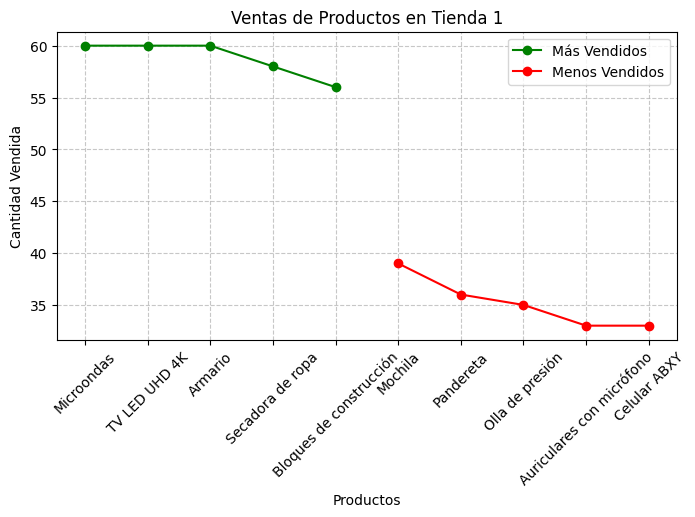

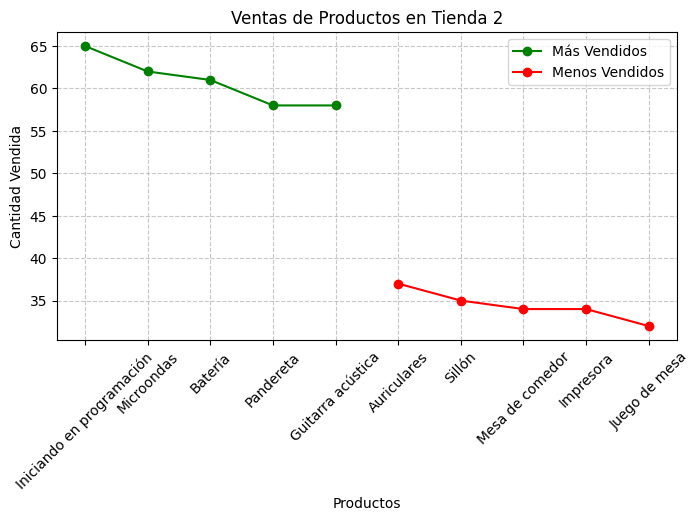

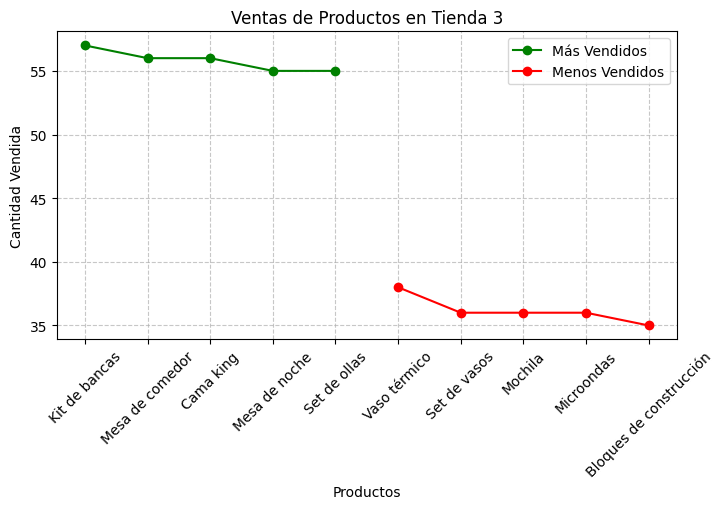

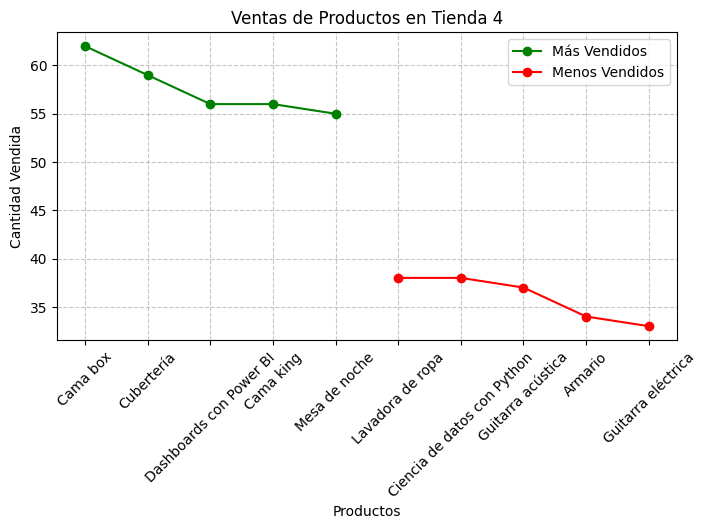

In [ ]:
# Función para encontrar los productos más y menos vendidos
def productos_vendidos(df):
    conteo_ventas = {}

    # Recorrer las filas del DataFrame sin pandas en cálculos
    for _, fila in df.iterrows():
        producto = fila["Producto"]
        conteo_ventas[producto] = conteo_ventas.get(producto, 0) + 1

    # Convertir el diccionario en una lista ordenada
    productos_ordenados = sorted(conteo_ventas.items(), key=lambda x: x[1], reverse=True)

    return productos_ordenados[:5], productos_ordenados[-5:]  # Top 5 y últimos 5 productos

# Obtener los productos más y menos vendidos en cada tienda
mas_vendidos_1, menos_vendidos_1 = productos_vendidos(tienda)
mas_vendidos_2, menos_vendidos_2 = productos_vendidos(tienda2)
mas_vendidos_3, menos_vendidos_3 = productos_vendidos(tienda3)
mas_vendidos_4, menos_vendidos_4 = productos_vendidos(tienda4)


# Función para encontrar los productos más y menos vendidos
def productos_vendidos(df):
    conteo_ventas = {}

    # Recorrer las filas del DataFrame sin pandas en cálculos
    for _, fila in df.iterrows():
        producto = fila["Producto"]
        conteo_ventas[producto] = conteo_ventas.get(producto, 0) + 1

    # Convertir el diccionario en una lista ordenada
    productos_ordenados = sorted(conteo_ventas.items(), key=lambda x: x[1], reverse=True)

    return productos_ordenados[:5], productos_ordenados[-5:]  # Top 5 y últimos 5 productos

# Obtener los productos más y menos vendidos en cada tienda
mas_vendidos_1, menos_vendidos_1 = productos_vendidos(tienda)
mas_vendidos_2, menos_vendidos_2 = productos_vendidos(tienda2)
mas_vendidos_3, menos_vendidos_3 = productos_vendidos(tienda3)
mas_vendidos_4, menos_vendidos_4 = productos_vendidos(tienda4)


# Definir un ancho fijo para las columnas
ANCHO_COLUMNA = 28

# Función para mostrar las tablas con un ancho estándar
def mostrar_tablas(tienda_nombre, mas_vendidos, menos_vendidos):
    print(f"\n{'-' * (ANCHO_COLUMNA * 3 + 10)}")
    print(f"{tienda_nombre.center(ANCHO_COLUMNA * 2 + 10)}")
    print(f"{'-' * (ANCHO_COLUMNA * 3 + 10)}")

    print(f"{'Más Vendidos':<{ANCHO_COLUMNA}} {'Cantidad':<10} {'|':^5} {'Menos Vendidos':<{ANCHO_COLUMNA}} {'Cantidad':<10}")
    print(f"{'-' * ANCHO_COLUMNA} {'-' * 10} {'-' * 5} {'-' * ANCHO_COLUMNA} {'-' * 10}")

    for (producto_mas, cantidad_mas), (producto_menos, cantidad_menos) in zip(mas_vendidos, menos_vendidos):
        print(f"{producto_mas:<{ANCHO_COLUMNA}} {cantidad_mas:>10} {'|':^5} {producto_menos:<{ANCHO_COLUMNA}} {cantidad_menos:>10}")

# Mostrar las tablas alineadas por tienda
mostrar_tablas("Tienda 1", mas_vendidos_1, menos_vendidos_1)
mostrar_tablas("Tienda 2", mas_vendidos_2, menos_vendidos_2)
mostrar_tablas("Tienda 3", mas_vendidos_3, menos_vendidos_3)
mostrar_tablas("Tienda 4", mas_vendidos_4, menos_vendidos_4)


import matplotlib.pyplot as plt

# Función para graficar las ventas con líneas y puntos resaltados
def graficar_lineas(tienda_nombre, mas_vendidos, menos_vendidos):
    productos_mas, ventas_mas = zip(*mas_vendidos)
    productos_menos, ventas_menos = zip(*menos_vendidos)

    plt.figure(figsize=(8, 4))

    # Graficar los productos más vendidos
    plt.plot(productos_mas, ventas_mas, marker="o", linestyle="-", color="green", label="Más Vendidos")

    # Graficar los productos menos vendidos
    plt.plot(productos_menos, ventas_menos, marker="o", linestyle="-", color="red", label="Menos Vendidos")

    plt.xlabel("Productos")
    plt.ylabel("Cantidad Vendida")
    plt.title(f"Ventas de Productos en {tienda_nombre}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.show()

# Generar gráficos para cada tienda
graficar_lineas("Tienda 1", mas_vendidos_1, menos_vendidos_1)
graficar_lineas("Tienda 2", mas_vendidos_2, menos_vendidos_2)
graficar_lineas("Tienda 3", mas_vendidos_3, menos_vendidos_3)
graficar_lineas("Tienda 4", mas_vendidos_4, menos_vendidos_4)




# 5. Envío promedio por tienda

Tienda 1: $26018.6
Tienda 2: $25216.2
Tienda 3: $24805.7
Tienda 4: $23459.5


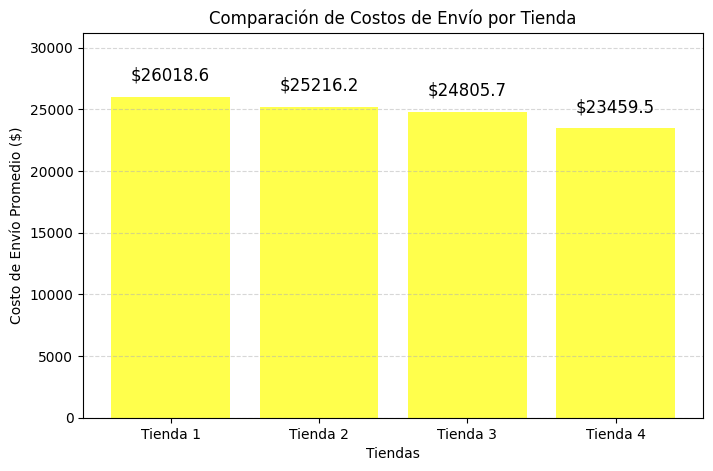

In [ ]:
# Función para calcular el costo de envío promedio de una tienda
def calcularEnvioPromedio(df):
    sumaEnvios = 0
    totalPedidos = 0

    # Recorrer cada fila
    for _, fila in df.iterrows():
        CostoEnvio = float(fila["Costo de envío"])  # Convertir a número
        sumaEnvios += CostoEnvio
        totalPedidos += 1

    # Calcular el promedio
    return sumaEnvios / totalPedidos if totalPedidos > 0 else 0

# Calcular costos de envío promedio para cada tienda
envioTienda1 = calcularEnvioPromedio(tienda)
envioTienda2 = calcularEnvioPromedio(tienda2)
envioTienda3 = calcularEnvioPromedio(tienda3)
envioTienda4 = calcularEnvioPromedio(tienda4)

# Mostrar los resultados formateados
print(f"Tienda 1: ${round(envioTienda1,1)}")
print(f"Tienda 2: ${round(envioTienda2,1)}")
print(f"Tienda 3: ${round(envioTienda3,1)}")
print(f"Tienda 4: ${round(envioTienda4,1)}")


import matplotlib.pyplot as plt

# Datos de costos de envío por tienda
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costos_envio = [envioTienda1, envioTienda2, envioTienda3, envioTienda4]

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, costos_envio, color="yellow", alpha=0.7)

# Personalizar la gráfica
plt.xlabel("Tiendas")
plt.ylabel("Costo de Envío Promedio ($)")
plt.title("Comparación de Costos de Envío por Tienda")
plt.ylim(0, max(costos_envio) * 1.2)  # Ajustar el rango del eje Y para mejor visibilidad
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Mostrar los valores exactos en las barras
for i, valor in enumerate(costos_envio):
    plt.text(i, valor + (max(costos_envio) * 0.05), f"${valor:.1f}", ha="center", fontsize=12)

# Mostrar la gráfica
plt.show()